Importing Libraries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics  import mean_absolute_error,  mean_squared_error,  r2_score

Load Data

In [85]:
performance_data = pd.read_csv(r'../Data/Student_Performance.csv')
performance_data.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Explore Data

In [86]:
print(performance_data.shape)
print(performance_data.info())
print(performance_data.describe())

(10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000

Data Preprocessing

Data Quality Issues
a.Checking for missing data
b.Checking for duplicate data

In [87]:
performance_data.isnull().any()

Hours Studied                       False
Previous Scores                     False
Extracurricular Activities          False
Sleep Hours                         False
Sample Question Papers Practiced    False
Performance Index                   False
dtype: bool

In [88]:
# Check for duplicates
print(performance_data.isnull().any())

# Print Sum of duplicated data
print()
print(performance_data.duplicated().sum() , "duplicated data found")

# Identify duplicated rows
duplicated_rows = performance_data[performance_data.duplicated()]

# Display duplicated rows
print()
print("Duplicated rows:")
duplicated_rows.head()


Hours Studied                       False
Previous Scores                     False
Extracurricular Activities          False
Sleep Hours                         False
Sample Question Papers Practiced    False
Performance Index                   False
dtype: bool

127 duplicated data found

Duplicated rows:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0


In [89]:
# Identify all rows that are duplicated, including the first occurrence
all_duplicated_rows = performance_data[performance_data.duplicated(keep=False)]

# Display all duplicated rows
print("All duplicated rows, including first occurrences:")
all_duplicated_rows.head()

All duplicated rows, including first occurrences:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
202,9,52,No,5,9,48.0
212,5,41,No,8,4,26.0
415,2,81,No,6,1,59.0
426,9,86,Yes,6,9,83.0
507,4,70,Yes,6,8,53.0


In [90]:
performance_data = performance_data.drop_duplicates()
performance_data.duplicated().any()

False

Data Tidiness

In [91]:
performance_data['Extracurricular Activities'] = performance_data['Extracurricular Activities'].apply(lambda x: 0 if x=='No' else 1)

In [92]:
scaler = StandardScaler()
scaled = scaler.fit_transform(performance_data)
scaled_data = pd.DataFrame(scaled,columns=performance_data.columns)
scaled_data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775566,1.706168,1.010078,1.454025,-1.249715,1.862979
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925,0.509348
2,1.161822,-1.064438,1.010078,0.275889,-0.900925,-0.531907
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925,-1.000471
4,0.775566,0.320865,-0.990022,0.864957,0.145444,0.561411
...,...,...,...,...,...,...
9868,-1.541976,-1.179880,1.010078,-1.491315,-0.900925,-1.677287
9869,0.775566,-0.314066,1.010078,0.864957,0.145444,0.144909
9870,0.389309,0.782633,1.010078,0.864957,0.145444,0.977912
9871,1.548079,1.590727,1.010078,0.275889,-1.598505,2.071230


Exploratory Data Analysis

Correlation Analysis

In [93]:
scaled_data.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


Outlier Analysis

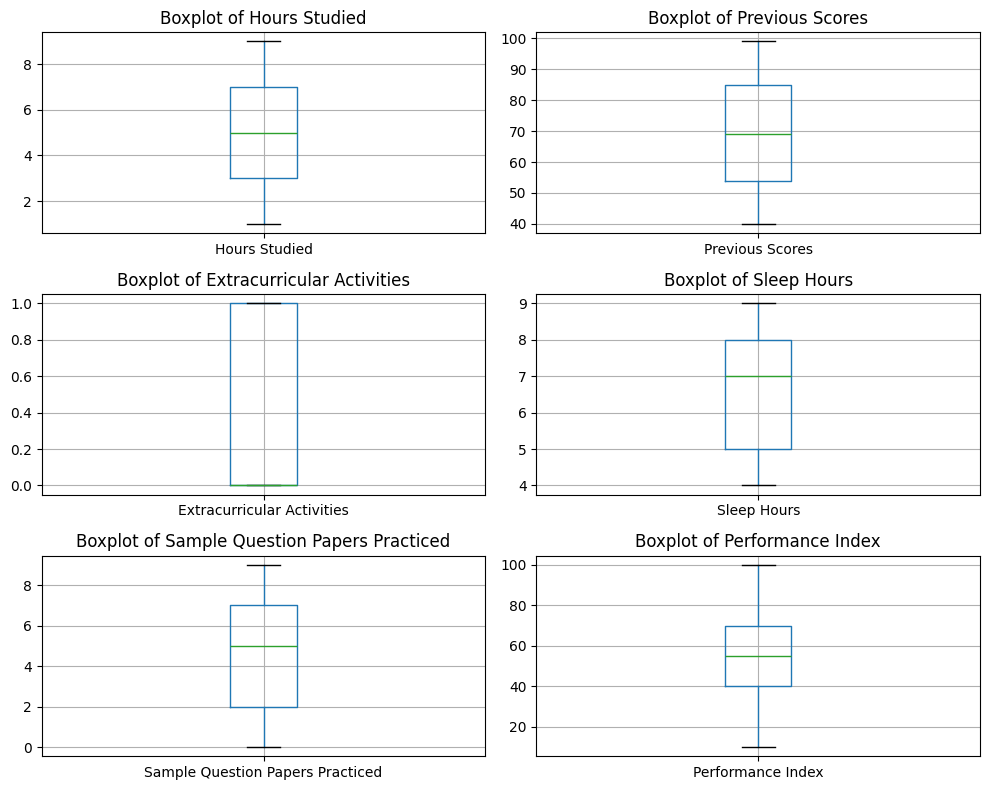

In [94]:
# Boxplot
fig, ax = plt.subplots(3, 2, figsize=(10, 8))
# Flatten the axes array for easy iteration
ax = ax.flatten()
numeric_columns = performance_data.select_dtypes(include=['int', 'float']).columns
for i, col in enumerate(numeric_columns):
    axes = ax[i]
    axes.set_title(f'Boxplot of {col}')
    bp=performance_data.boxplot(column=col, ax=axes)
    
plt.tight_layout()

In [95]:
# Skewness
for column in performance_data.columns:
    skewness = performance_data[column].skew()
    kurtosis = performance_data[column].kurtosis()
    print(f'{column}: Skewness={skewness:.3f}, Kurtosis={kurtosis + 3:.3f}')

Hours Studied: Skewness=-0.003, Kurtosis=1.766
Previous Scores: Skewness=0.006, Kurtosis=1.788
Extracurricular Activities: Skewness=0.020, Kurtosis=1.000
Sleep Hours: Skewness=-0.041, Kurtosis=1.741
Sample Question Papers Practiced: Skewness=-0.035, Kurtosis=1.786
Performance Index: Skewness=-0.000, Kurtosis=2.140


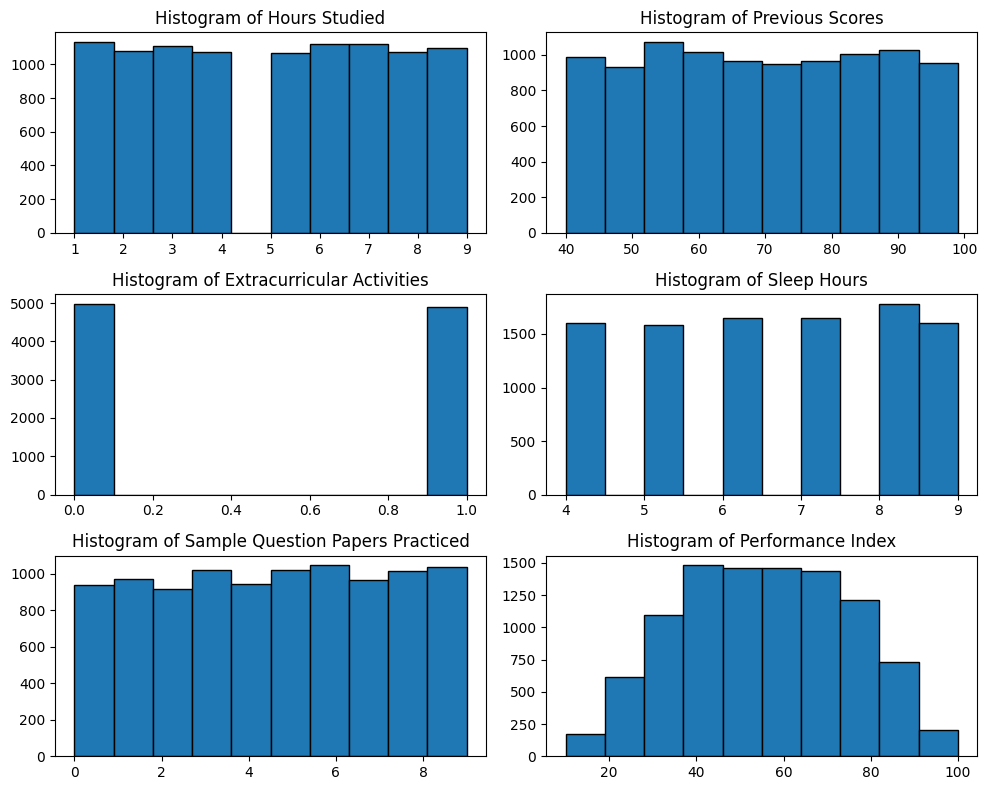

In [96]:
# Histogram Distribution
fig, ax = plt.subplots(3, 2, figsize=(10, 8))
# Flatten the axes array for easy iteration
ax = ax.flatten()
numeric_columns = performance_data.select_dtypes(include=['int', 'float']).columns
for i, col in enumerate(numeric_columns):
    axes = ax[i]
    axes.set_title(f'Histogram of {col}')
    axes.hist(performance_data[col], bins=10, edgecolor='k')
    
plt.tight_layout()


Model Building

In [97]:
y = scaled_data['Performance Index']
x = scaled_data.drop(columns=['Performance Index'])

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state= 50, shuffle =True)

In [99]:
pipelines = {
    'linear': Pipeline([('scaler', StandardScaler()),('regressor', LinearRegression())]),
    'ridge': Pipeline([('scaler', StandardScaler()),('regressor', Ridge())]),
    'lasso': Pipeline([('scaler', StandardScaler()),('regressor', Lasso())])}

In [100]:
# Train and evaluate each model
results = {}
for name, pipeline in pipelines.items():
   
    # Fit the pipeline on the training data
    pipeline.fit(x_train, y_train)
    
    # Extract the regressor from the pipeline
    model = pipeline.named_steps['regressor']
   
    # Intercpt and coefficient
    intercept = model.intercept_
    coefficient = model.coef_

    # Make predictions
    y_pred = model.predict(x_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'intercept': intercept,
        'coefficient': coefficient,
        'y_pred': y_pred,
        'mae': mae,
        'mse': mse,
        'r2': r2}

# Display the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"  Intercept: {result['intercept']:.4f}")
    print(f"  Coefficient: {result['coefficient']:}")
    print(f"  Mean Absolute Error: {result['mae']:.4f}")
    print(f"  Mean Squared Error: {result['mse']:.4f}")
    print(f"  R2 Score: {result['r2']:.4f}")
    print()

Model: linear
  Intercept: 0.0091
  Coefficient: [0.38405198 0.91670162 0.01560697 0.04246369 0.02901277]
  Mean Absolute Error: 0.0846
  Mean Squared Error: 0.0114
  R2 Score: 0.9885

Model: ridge
  Intercept: 0.0091
  Coefficient: [0.38399598 0.91656886 0.01560536 0.04245963 0.0290118 ]
  Mean Absolute Error: 0.0846
  Mean Squared Error: 0.0114
  R2 Score: 0.9885

Model: lasso
  Intercept: 0.0091
  Coefficient: [0. 0. 0. 0. 0.]
  Mean Absolute Error: 0.8400
  Mean Squared Error: 0.9955
  R2 Score: -0.0009



c:\Users\Nerat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Nerat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\Nerat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


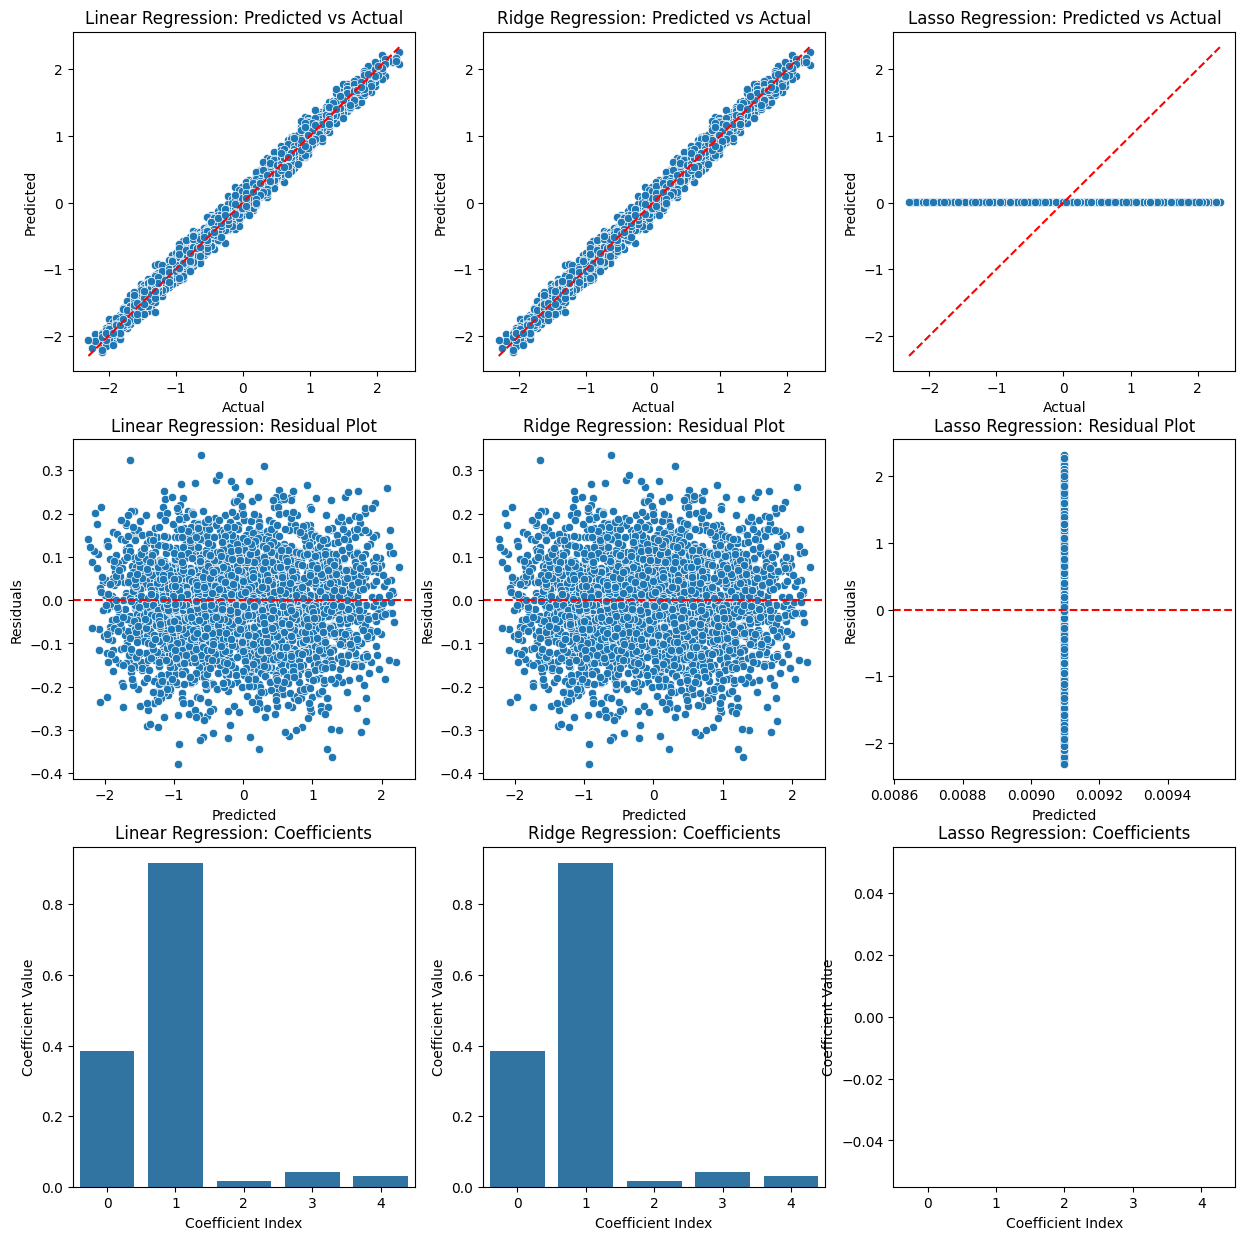

In [101]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, (name, result) in enumerate(results.items()):
    model = result['model']
    y_pred = result['y_pred']

    # Predicted vs Actual
    sns.scatterplot(x=y_test, y=y_pred, ax=axes[0, i])
    axes[0, i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    axes[0, i].set_title(f'{name.capitalize()} Regression: Predicted vs Actual')
    axes[0, i].set_xlabel('Actual')
    axes[0, i].set_ylabel('Predicted')

    # Residual Plot
    sns.scatterplot(x=y_pred, y=y_test - y_pred, ax=axes[1, i])
    axes[1, i].axhline(0, color='r', linestyle='--')
    axes[1, i].set_title(f'{name.capitalize()} Regression: Residual Plot')
    axes[1, i].set_xlabel('Predicted')
    axes[1, i].set_ylabel('Residuals')

    # Coefficient Plot
    coefficients = model.coef_
    sns.barplot(x=np.arange(len(coefficients)), y=coefficients, ax=axes[2, i])
    axes[2, i].set_title(f'{name.capitalize()} Regression: Coefficients')
    axes[2, i].set_xlabel('Coefficient Index')
    axes[2, i].set_ylabel('Coefficient Value')

Fine Tuning and Evaluation

In [102]:
# Define hyperparameters for GridSearchCV
param_grids = {
    'ridge': {'regressor__alpha': [0.1, 1, 10, 100]},
    'lasso': {'regressor__alpha': [0.01, 0.1, 1, 10]}
}

In [ ]:
# Train and evaluate each model
results_tuned = {}
for name, pipeline in pipelines.items():
    if name != 'linear':
        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='r2')
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_

        # Make predictions
        y_pred_tuned = best_model.predict(x_test)

        # Evaluate the model
        mae_tuned = mean_absolute_error(y_test,y_pred_tuned)
        mse_tuned = mean_squared_error(y_test, y_pred_tuned)
        r2_tuned = r2_score(y_test, y_pred_tuned)

        results_tuned[name] = {
        'model_tuned': best_model,
        'y_pred_tuned': y_pred_tuned,
        'mae_tuned': mae_tuned,
        'mse_tuned': mse_tuned,
        'r2_tuned': r2_tuned}

        # Display the results
        for name, result in results_tuned.items():
            print(f"Model: {name}")
            print(f"  Mean Absolute Error: {result['mae_tuned']:.4f}")
            print(f"  Mean Squared Error: {result['mse_tuned']:.4f}")
            print(f"  R2 Score: {result['r2_tuned']:.4f}")
            print()

In [ ]:
results_tuned

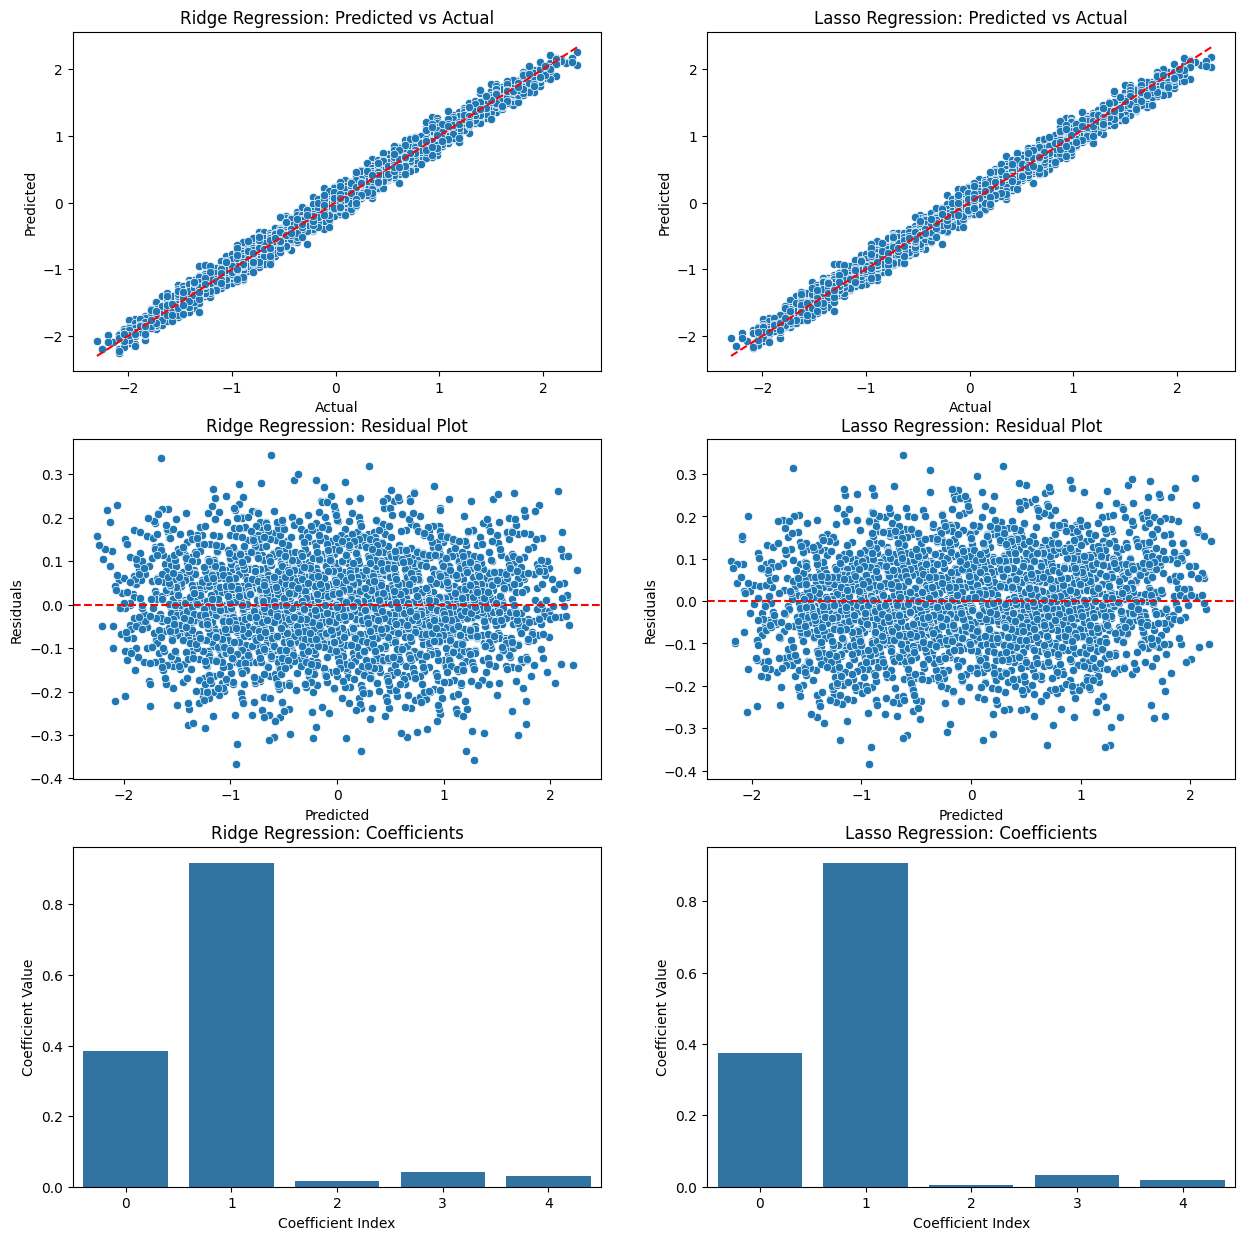

In [109]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, (name, result) in enumerate(results_tuned.items()):
    model = result['model_tuned']
    y_pred_tuned = result['y_pred_tuned']

    # Predicted vs Actual
    sns.scatterplot(x=y_test, y=y_pred_tuned, ax=axes[0, i])
    axes[0, i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    axes[0, i].set_title(f'{name.capitalize()} Regression: Predicted vs Actual')
    axes[0, i].set_xlabel('Actual')
    axes[0, i].set_ylabel('Predicted')

    # Residual Plot
    sns.scatterplot(x=y_pred_tuned, y=y_test - y_pred_tuned, ax=axes[1, i])
    axes[1, i].axhline(0, color='r', linestyle='--')
    axes[1, i].set_title(f'{name.capitalize()} Regression: Residual Plot')
    axes[1, i].set_xlabel('Predicted')
    axes[1, i].set_ylabel('Residuals')

    # Coefficient Plot
    coefficients = model.named_steps['regressor'].coef_
    sns.barplot(x=np.arange(len(coefficients)), y=coefficients, ax=axes[2, i])
    axes[2, i].set_title(f'{name.capitalize()} Regression: Coefficients')
    axes[2, i].set_xlabel('Coefficient Index')
    axes[2, i].set_ylabel('Coefficient Value')